In [39]:
import csv
import math
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [67]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [68]:
train_data['label'] = pd.Categorical(train_data['label'], categories=train_data['label'].unique()).codes
print('Train Data set size = ', train_data.shape)
print('Test Data set size = ', test_data.shape)
train_data.head()

Train Data set size =  (17176, 14)
Test Data set size =  (8576, 13)


,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,0
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,0
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,0
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,0
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,0


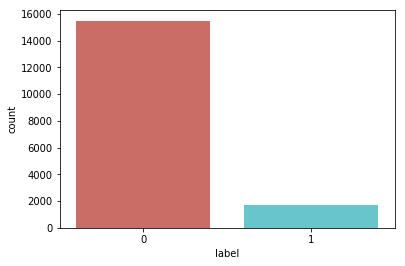

In [69]:
sns.countplot(x='label', data=train_data, palette='hls')
plt.show()

**Preprocessing**

In [70]:
cols = train_data.columns.values
cols = np.delete(cols,[0,6,7,8,9,10,11]) #remove id column

fresh_train_data = train_data[cols]
#fresh_my_data = fresh_my_data[~np.isnan(fresh_my_data).any(axis=1)] #remove missing values
fresh_train_data = fresh_train_data.dropna(axis=0)
cols = np.delete(cols,-1) #remove label column

print(cols)
X_train = fresh_train_data[cols]
y_train = fresh_train_data['label']
print('Train Data set size = ', fresh_train_data.shape)
fresh_train_data.head()

['additional_fare' 'duration' 'meter_waiting' 'meter_waiting_fare'
 'meter_waiting_till_pickup' 'fare']
Train Data set size =  (16968, 7)


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label
0,10.5,834.0,56.0,0.0000,64.0,270.32,0
1,10.5,791.0,47.0,0.0000,134.0,197.85,0
2,10.5,1087.0,80.0,0.0000,61.0,301.64,0
3,10.5,598.0,271.0,15.6638,68.0,82.30,0
5,10.5,3407.0,182.0,0.0000,112.0,1065.02,0


In [71]:
fresh_test_data = test_data[cols]
fresh_test_data = fresh_test_data.dropna(axis=0)

print('Test Data set size = ', fresh_test_data.shape)

Test Data set size =  (8576, 6)


In [72]:
fresh_test_data.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare
0,10.5,924,42,2.4486,148,289.27
1,10.5,4249,20,0.0000,91,1912.70
2,10.5,1552,255,2.6588,23,394.00
3,10.5,462,16,0.0000,198,154.32
4,10.5,814,392,12.3692,69,147.47


**Random Forest**

In [74]:
clf=RandomForestClassifier(n_estimators=20)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
y_pred=clf.predict(fresh_test_data)

In [76]:
d = {'tripid': test_data['tripid'], 'prediction': y_pred}
result_df = pd.DataFrame(data=d)
result_df.head()


,tripid,prediction
0,213284604,0
1,213286352,0
2,213293973,0
3,213294622,0
4,213298687,0


In [77]:
result_df.to_csv('output.csv', index=False)